# Importation des packages et des données

In [1]:
import pandas as pd
from fanalysis.ca import CA
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("election_2022_FR.xlsx")
df

,Departement,Nathalie ARTHAUD,Fabien ROUSSEL,Emmanuel MACRON,Jean LASSALLE,Marine LE PEN,Éric ZEMMOUR,Jean-Luc MÉLENCHON,Anne HIDALGO,Yannick JADOT,Valérie PÉCRESSE,Philippe POUTOU,Nicolas DUPONT-AIGNAN
0,Seine-Saint-Denis,2756,11642,110118,6805,64543,27969,266632,5890,19352,17481,3663,6300
1,Val-de-Marne,2504,14954,171409,8944,69599,43430,192427,8276,31904,32522,3730,9359
2,Val-d'Oise,2392,10060,138166,9101,91081,37564,175666,6094,20710,26403,3352,8996
3,Essonne,2831,13480,164503,11610,105862,39284,167310,7944,29562,33046,4306,15203
4,Hauts-de-Seine,2306,13170,287494,11260,64812,62761,199640,10518,47103,62231,3704,9743
5,Paris,2891,17267,372820,12139,58429,86088,317372,22901,80268,69564,5732,9591
6,Seine-et-Marne,3440,12843,165208,13797,155738,47893,170969,7853,26718,36828,4600,15042
7,Yvelines,2774,11721,246062,13687,101398,64407,168585,9046,40470,61296,3963,13097


# Description des données

In [3]:
# Extraction des noms de colonnes et de la colonne "Departement"
col_names = list(df.columns)[1:]
dept_names = df['Departement']


In [4]:
# Extraction des données numériques
X = df[col_names].values

## Distribution des votes des départements par candidat

In [5]:
# Calcul du profil ligne
row_sum = np.sum(X, axis=1)
row_profile = X / row_sum[:, np.newaxis]

# Affichage
print("Profil ligne:")
print(pd.DataFrame(row_profile, index=dept_names, columns=col_names))




Profil ligne:
                   Nathalie ARTHAUD  Fabien ROUSSEL  Emmanuel MACRON  \
Departement                                                            
Seine-Saint-Denis          0.005074        0.021434         0.202739   
Val-de-Marne               0.004251        0.025386         0.290988   
Val-d'Oise                 0.004517        0.018996         0.260895   
Essonne                    0.004758        0.022658         0.276503   
Hauts-de-Seine             0.002976        0.016999         0.371084   
Paris                      0.002740        0.016366         0.353363   
Seine-et-Marne             0.005205        0.019432         0.249963   
Yvelines                   0.003766        0.015914         0.334094   

                   Jean LASSALLE  Marine LE PEN  Éric ZEMMOUR  \
Departement                                                     
Seine-Saint-Denis       0.012529       0.118831      0.051494   
Val-de-Marne            0.015184       0.118153      0.073728   
Val-d

## Répartition des votes obtenus par les candidats selon les départements

In [6]:
# Calcul du profil colonne
col_sum = np.sum(X, axis=0)
col_profile = X / col_sum[np.newaxis, :]

# Affichage
print("Profil colonne:")
print(pd.DataFrame(col_profile, index=dept_names, columns=col_names))

Profil colonne:
                   Nathalie ARTHAUD  Fabien ROUSSEL  Emmanuel MACRON  \
Departement                                                            
Seine-Saint-Denis          0.125879        0.110732         0.066505   
Val-de-Marne               0.114369        0.142233         0.103522   
Val-d'Oise                 0.109254        0.095685         0.083445   
Essonne                    0.129305        0.128214         0.099351   
Hauts-de-Seine             0.105326        0.125265         0.173631   
Paris                      0.132045        0.164233         0.225163   
Seine-et-Marne             0.157121        0.122155         0.099777   
Yvelines                   0.126701        0.111483         0.148608   

                   Jean LASSALLE  Marine LE PEN  Éric ZEMMOUR  \
Departement                                                     
Seine-Saint-Denis       0.077911       0.090719      0.068318   
Val-de-Marne            0.102401       0.097825      0.106083   
Val

## Analyse des votes 

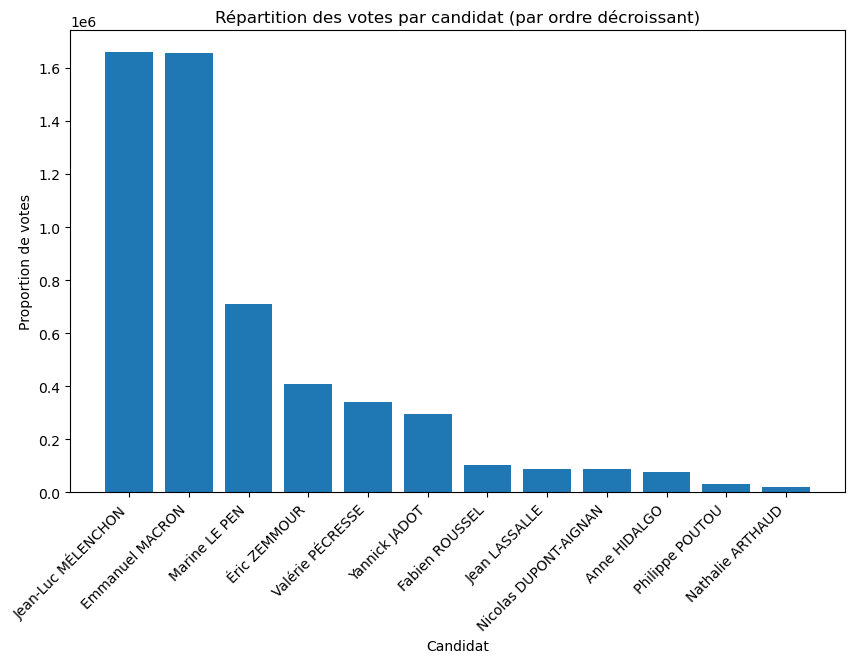

In [7]:
# Extraction des noms de colonnes
col_names = list(df.columns)[1:]

# Calcul de la somme des votes pour chaque candidat
total_votes = df[col_names].sum()

# Calcul des proportions pour chaque candidat
prop_votes = total_votes 
# Tri des proportions de la plus grande à la plus petite
prop_votes = prop_votes.sort_values(ascending=False)

# Création du diagramme en barres
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(prop_votes.index, prop_votes)

# Ajout de labels et de titres
ax.set_xlabel('Candidat')
ax.set_ylabel('Proportion de votes')
ax.set_title('Répartition des votes par candidat (par ordre décroissant)')
# Rotation des noms des candidats
plt.xticks(rotation=45, ha='right')

# Affichage du diagramme
plt.show()



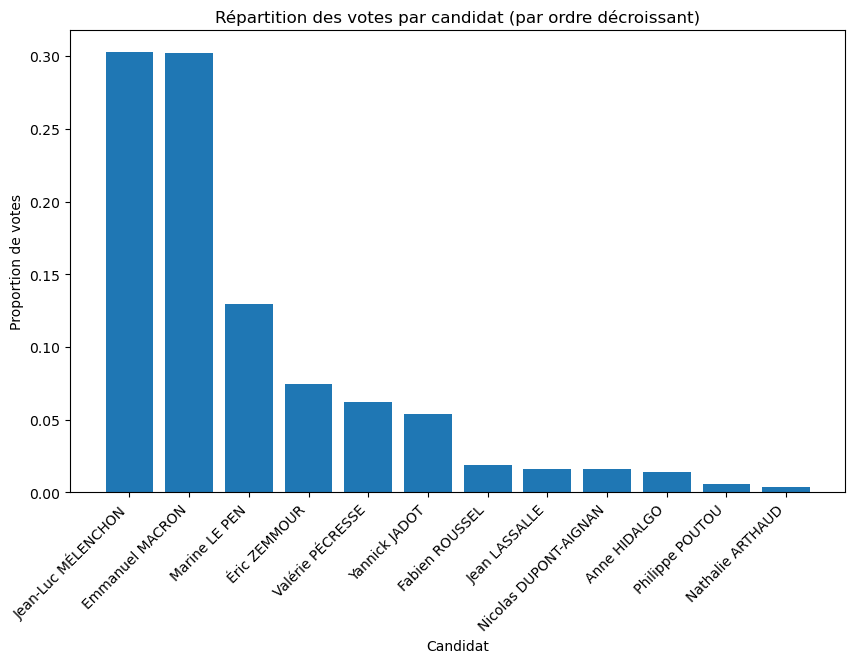

In [8]:
# Extraction des noms de colonnes
col_names = list(df.columns)[1:]

# Calcul de la somme des votes pour chaque candidat
total_votes = df[col_names].sum()

# Calcul des proportions pour chaque candidat
prop_votes = total_votes / total_votes.sum()

# Tri des proportions de la plus grande à la plus petite
prop_votes = prop_votes.sort_values(ascending=False)

# Création du diagramme en barres
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(prop_votes.index, prop_votes)

# Ajout de labels et de titres
ax.set_xlabel('Candidat')
ax.set_ylabel('Proportion de votes')
ax.set_title('Répartition des votes par candidat (par ordre décroissant)')
# Rotation des noms des candidats
plt.xticks(rotation=45, ha='right')

# Affichage du diagramme
plt.show()


# L'Analyse Factorielle des Correspondances (AFC) - Théorie

L'analyse factorielle des correspondances (AFC) est une méthode statistique qui permet de réduire les dimensions d'un tableau de données croisées. Elle permet également de visualiser la structure des relations entre les variables et les individus en utilisant des graphiques.

## Étape 1 : Construction du tableau de données

L'AFC nécessite un tableau de données croisées appelé "tableau de contingence". Ce tableau doit être construit à partir des données brutes, en croisant les valeurs de chaque variable.

|     | Variable 1 | Variable 2 | ... | Variable p |
| --- | --- | --- | --- | --- |
| Individu 1 | $n_{11}$ | $n_{12}$ | ... | $n_{1p}$ |
| Individu 2 | $n_{21}$ | $n_{22}$ | ... | $n_{2p}$ |
| ... | ... | ... | ... | ... |
| Individu n | $n_{n1}$ | $n_{n2}$ | ... | $n_{np}$ |

Chaque $n_{ij}$ représente le nombre d'individus ayant à la fois la valeur $i$ pour la variable 1 et la valeur $j$ pour la variable 2.

## Étape 2 : Calcul de la distance de khi-deux

La distance de khi-deux est une mesure de la différence entre les observations et les fréquences attendues sous l'hypothèse d'indépendance entre les variables. Elle est utilisée pour mesurer la similitude entre deux variables. La formule de la distance de khi-deux est la suivante :

$$ d_{ij}^2 = \sum_{k=1}^{p}\frac{(n_{ik}n_{jk})^2}{n_{i\cdot}n_{\cdot k}n_{j\cdot}n_{\cdot k}} $$

où $n_{i\cdot}$ est la somme des effectifs de la ligne $i$, $n_{\cdot k}$ est la somme des effectifs de la colonne $k$ et $n_{\cdot\cdot}$ est la somme totale des effectifs du tableau.

## Étape 3 : Calcul de la matrice des distances

La matrice des distances est une matrice carrée qui mesure les distances entre chaque paire de variables. Elle est calculée en utilisant la distance de khi-deux entre chaque paire de variables.

## Étape 4 : Calcul des cosinus carrés et des contributions

Les cosinus carrés mesurent l'association entre chaque variable et chaque axe factoriel. Ils sont calculés en utilisant la formule suivante :

$$ cos^2_{ij} = \frac{f_{ij}^2}{r_i c_j} $$

où $f_{ij}$ est la fréquence observée de la variable $i$ pour la catégorie $j$, $r_i$ est la somme des fréquences de la variable $i$ et $c_j$ est la somme des fréquences de la catégorie $j$.

Les contributions mesurent l'importance de chaque variable pour l'axe factoriel correspondant. Elles sont calculées en utilisant la formule suivante :

$$ contribution_{ij} = \frac{cos^2_{ij}}{\lambda_j} $$

où $\lambda_j$ est la valeur propre de l'axe factoriel $j$. Les contributions sont exprimées en pourcentage et indiquent la part de la variance expliquée par chaque variable sur l'axe factoriel correspondant.

Les cosinus carrés et les contributions sont des indicateurs importants pour interpréter les résultats de l'AFC et sélectionner les variables les plus pertinentes pour chaque axe factoriel.

## Étape 5 : Calcul des valeurs propres

Les valeurs propres sont des mesures de l'importance de chaque axe factoriel pour expliquer la variation totale des données.

Les valeurs propres sont calculées à partir des cosinus carrés des variables sur chaque axe factoriel. La formule de calcul est la suivante :

$$ \lambda_j = \sum_{i=1}^{n}cos^2_{ij} $$

où $\lambda_j$ est la valeur propre de l'axe factoriel $j$ et $cos^2_{ij}$ est le carré du cosinus de l'angle formé entre la variable $i$ et l'axe factoriel $j$. Les valeurs propres sont ordonnées de manière décroissante, et l'axe factoriel qui a la plus grande valeur propre est appelé le premier axe factoriel.

## Étape 6 : Construction du graphique

Le graphique de l'AFC est un nuage de points qui représente les individus et les variables dans un espace de dimension réduite. Les axes du graphique sont les axes factoriels, et les points sont placés en fonction de leurs coordonnées sur ces axes. Les points qui sont proches les uns des autres ont des profils similaires.

Pour construire le graphique de l'AFC, on utilise les coordonnées factorielles des individus et des variables qui ont été calculées à l'étape 4. Les individus sont représentés par des cercles, et les variables sont représentées par des flèches qui indiquent leur contribution à chaque axe factoriel.

On peut également colorer les cercles ou les flèches en fonction d'une variable supplémentaire pour visualiser la relation entre cette variable et les axes factoriels.

## Résumé

L'Analyse Factorielle des Correspondances (AFC) est une méthode statistique qui permet de réduire les dimensions d'un tableau de données croisées. Elle permet également de visualiser la structure des relations entre les variables et les individus en utilisant des graphiques.


# AFC pratique

## Application de l'AFC avec fanalysis

In [9]:
df=df.set_index("Departement")


In [10]:
# On crée une instale de la classe CA en passant les étiquettes de lignes et les colonnes

my_ca=CA(row_labels=df.index.values,col_labels=df.columns.values,stats=True)

In [11]:
# Estime l'AFC
my_ca.fit(df.values)

CA(col_labels=array(['Nathalie ARTHAUD', 'Fabien ROUSSEL', 'Emmanuel MACRON',
       'Jean LASSALLE', 'Marine LE PEN', 'Éric ZEMMOUR',
       'Jean-Luc MÉLENCHON', 'Anne HIDALGO', 'Yannick JADOT',
       'Valérie PÉCRESSE', 'Philippe POUTOU', 'Nicolas DUPONT-AIGNAN'],
      dtype=object),
   row_labels=array(['Seine-Saint-Denis', 'Val-de-Marne', "Val-d'Oise", 'Essonne',
       'Hauts-de-Seine', 'Paris', 'Seine-et-Marne', 'Yvelines'],
      dtype=object))

## Aides à l'interprétation

### Choix du nombre d'axe factoriel

In [12]:
# Identification des valeurs propres
my_ca.eig_


array([[3.67708156e-02, 2.41324630e-02, 1.19731847e-03, 5.41407476e-04,
        1.51718248e-04, 1.35166582e-04, 2.74627897e-05],
       [5.84068396e+01, 3.83320541e+01, 1.90182313e+00, 8.59972756e-01,
        2.40989579e-01, 2.14698878e-01, 4.36219520e-02],
       [5.84068396e+01, 9.67388937e+01, 9.86407168e+01, 9.95006896e+01,
        9.97416792e+01, 9.99563780e+01, 1.00000000e+02]])

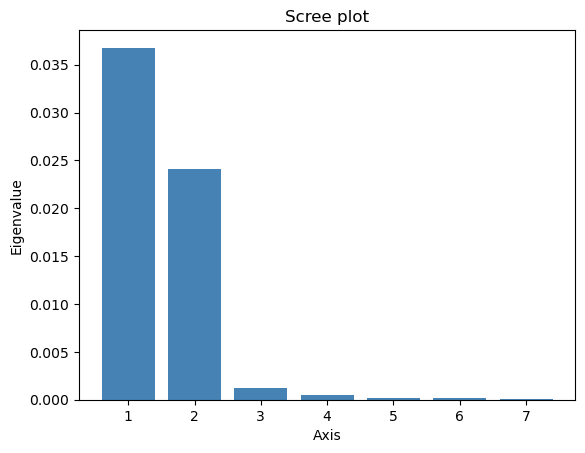

In [13]:
# Graphique des valeurs propres
my_ca.plot_eigenvalues()

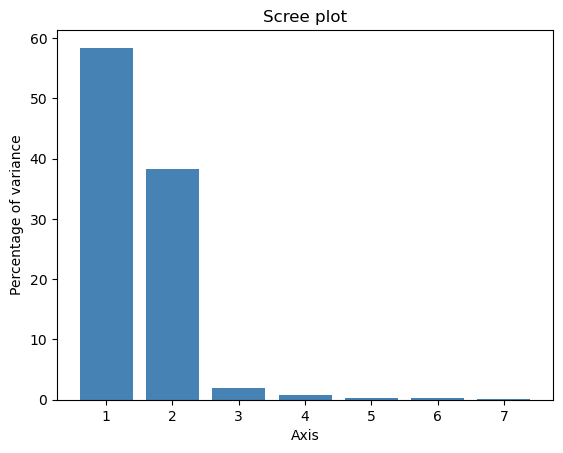

In [14]:
my_ca.plot_eigenvalues(type="percentage")

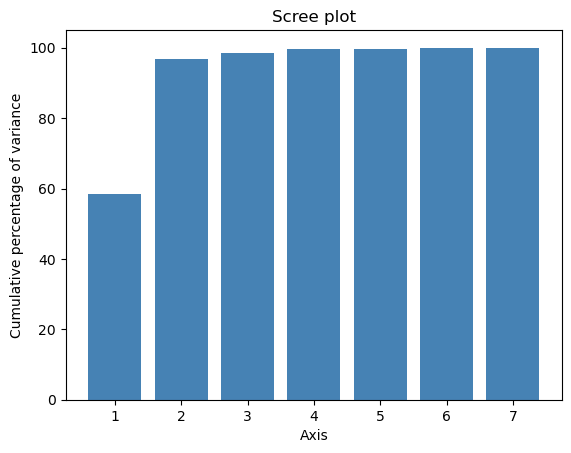

In [15]:
my_ca.plot_eigenvalues(type="cumulative")

### Analyse des qualités de représentation (cos 2)

#### Analyse suivant le profil ligne (les départements)

Premier axe factoriel


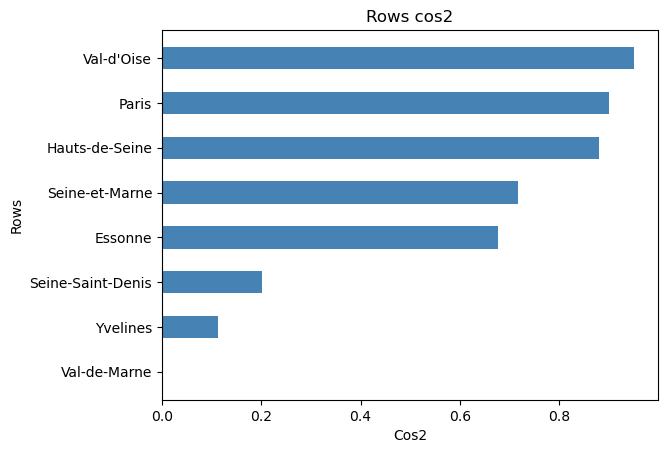

Second axe factoriel


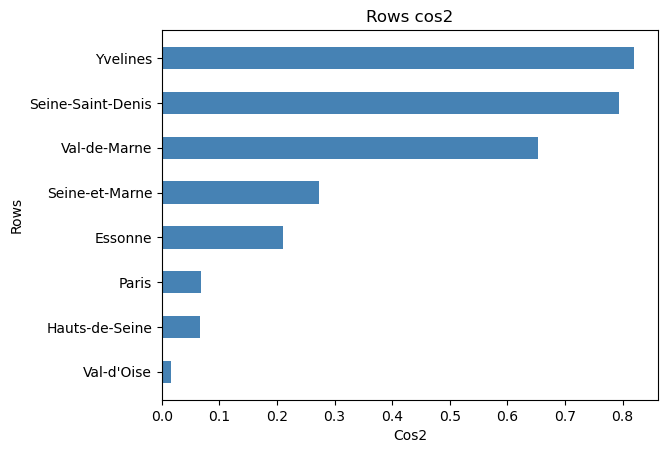

In [17]:


# Classement des points colonnes en fonction de leur contribution au 1er axe
print("Premier axe factoriel")
my_ca.plot_row_cos2(num_axis=1)
print("Second axe factoriel")
my_ca.plot_row_cos2(num_axis=2)


Premier axe factoriel


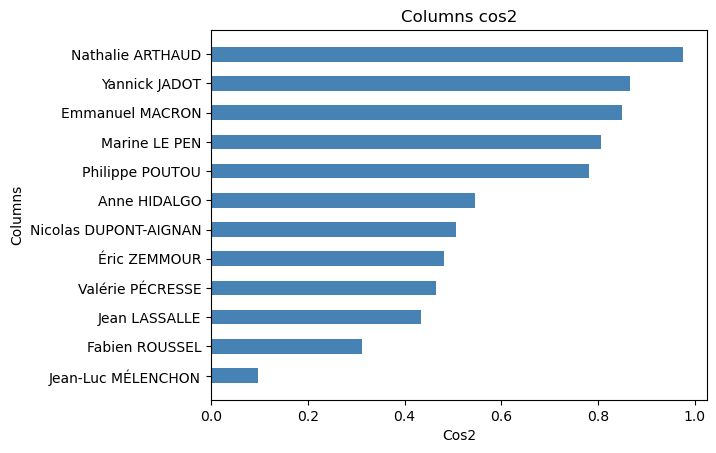

Second axe factoriel


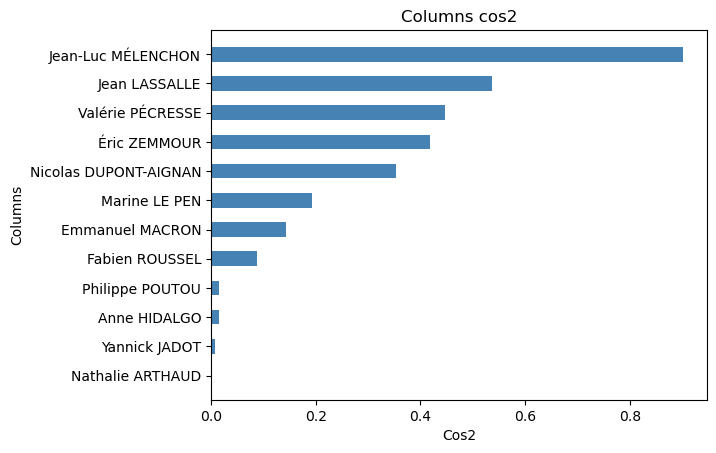

In [19]:
#### Profil colonne (les Candidats)

print("Premier axe factoriel")
my_ca.plot_col_cos2(num_axis=1)
print("Second axe factoriel")
my_ca.plot_col_cos2(num_axis=2)


### Analyses des contributions


#### Profil lignes (département)

Premier axe


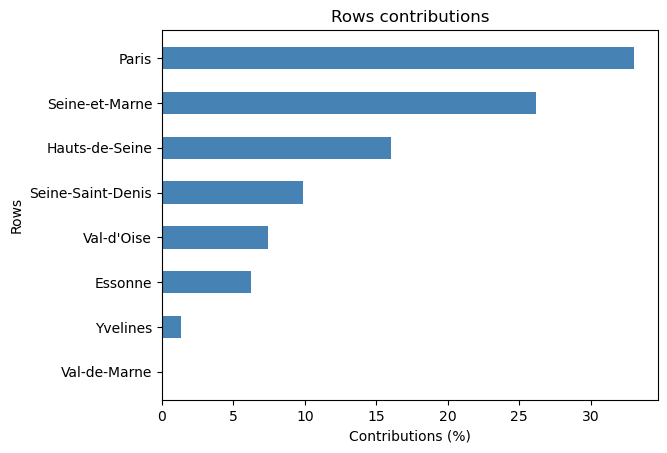

Second axe


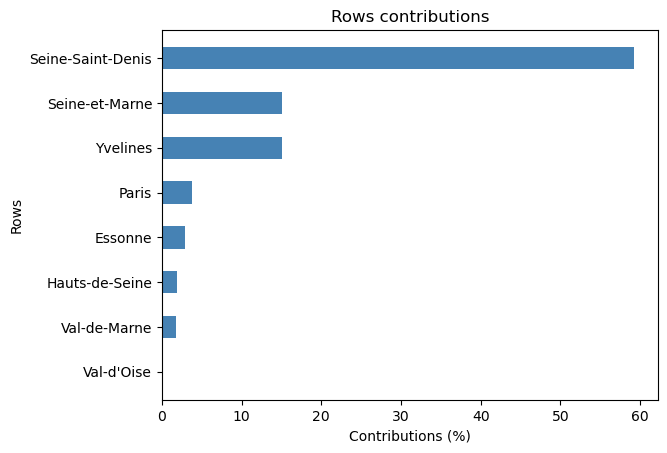

In [22]:
# Analyse  du premier plan factoriel - les départements
print("Premier axe")
my_ca.plot_row_contrib(num_axis=1)
print("Second axe")
my_ca.plot_row_contrib(num_axis=2)

#### Profil colonne (Candidats)

Premier axe


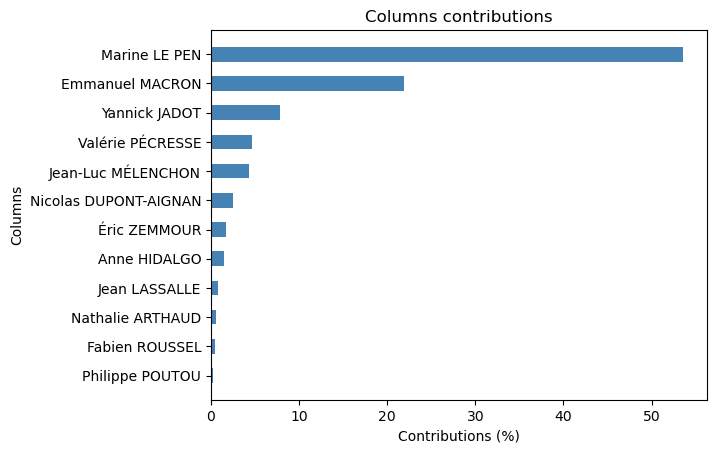

Second axe


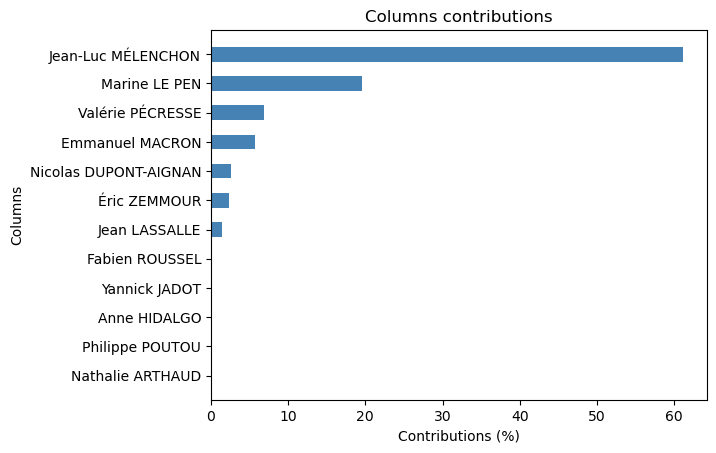

In [21]:
# Analyse  du premier plan factoriel - les départements
print("Premier axe")
my_ca.plot_col_contrib(num_axis=1)
print("Second axe")
my_ca.plot_col_contrib(num_axis=2)

### Tableau global

##### Coordonnées, contribution et les cosinus carré des départements sur les axes factoriels


In [ ]:
info_dep=my_ca.row_topandas()
info_dep

##### Coordonnées, contribution et les cosinus carré des candidats sur les axes factoriels

In [ ]:
info_candidat=my_ca.col_topandas()
info_candidat

### Analyse Graphique

#### Graphique des départements (profil ligne)

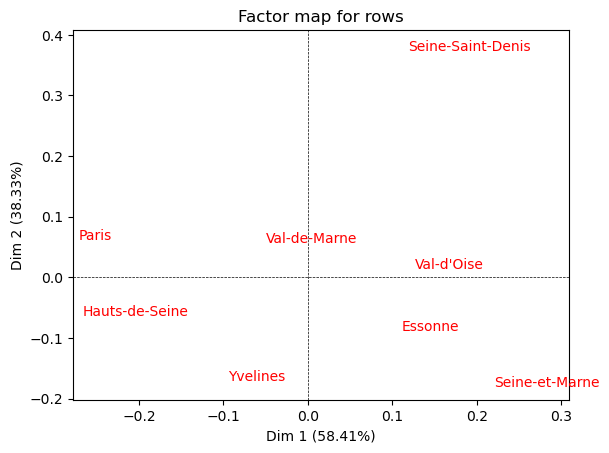

In [16]:
# Graphique des départements (en ligne)
my_ca.mapping_row(num_x_axis=1,num_y_axis=2)

#### Graphique des candidats (profil colonne)

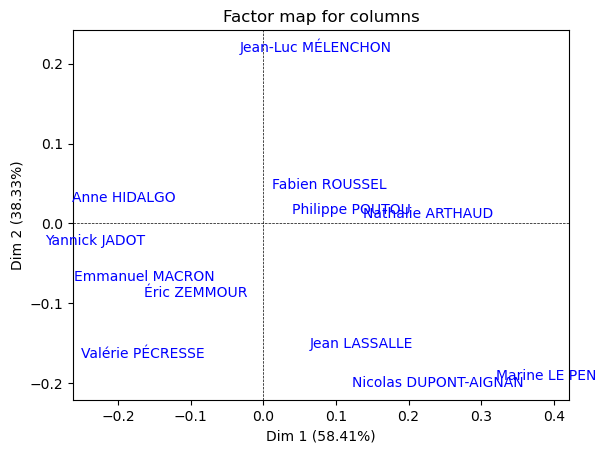

In [18]:
# Graphique des candidats (en colonne)
my_ca.mapping_col(num_x_axis=1,num_y_axis=2)

#### Graphique superposition des profils lignes et colonnes

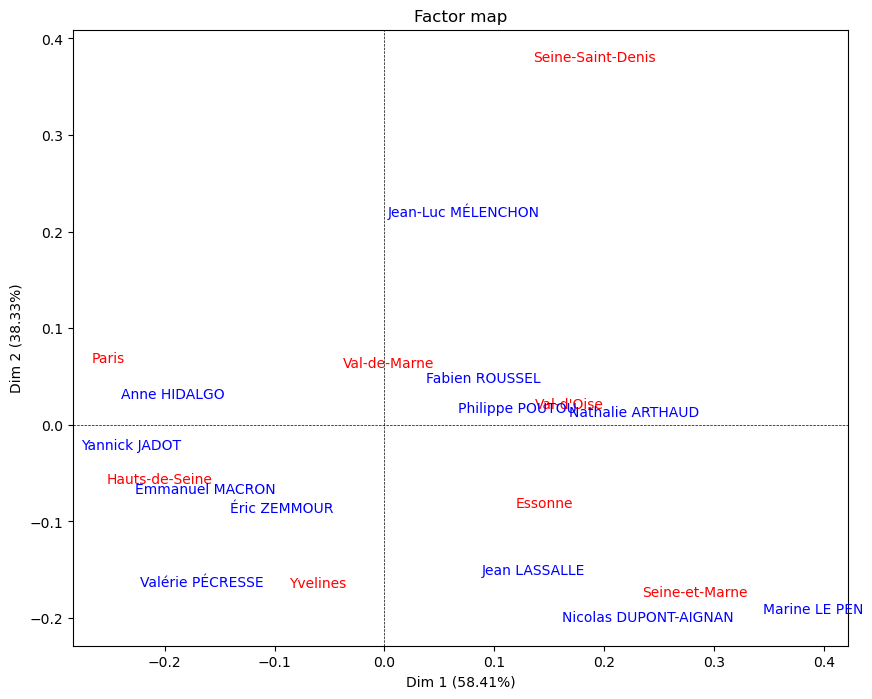

In [20]:
# Graphique profil ligne profil colonne

my_ca.mapping(1, 2, figsize=(10, 8))